In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../dataset/bank.csv", sep=";");df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


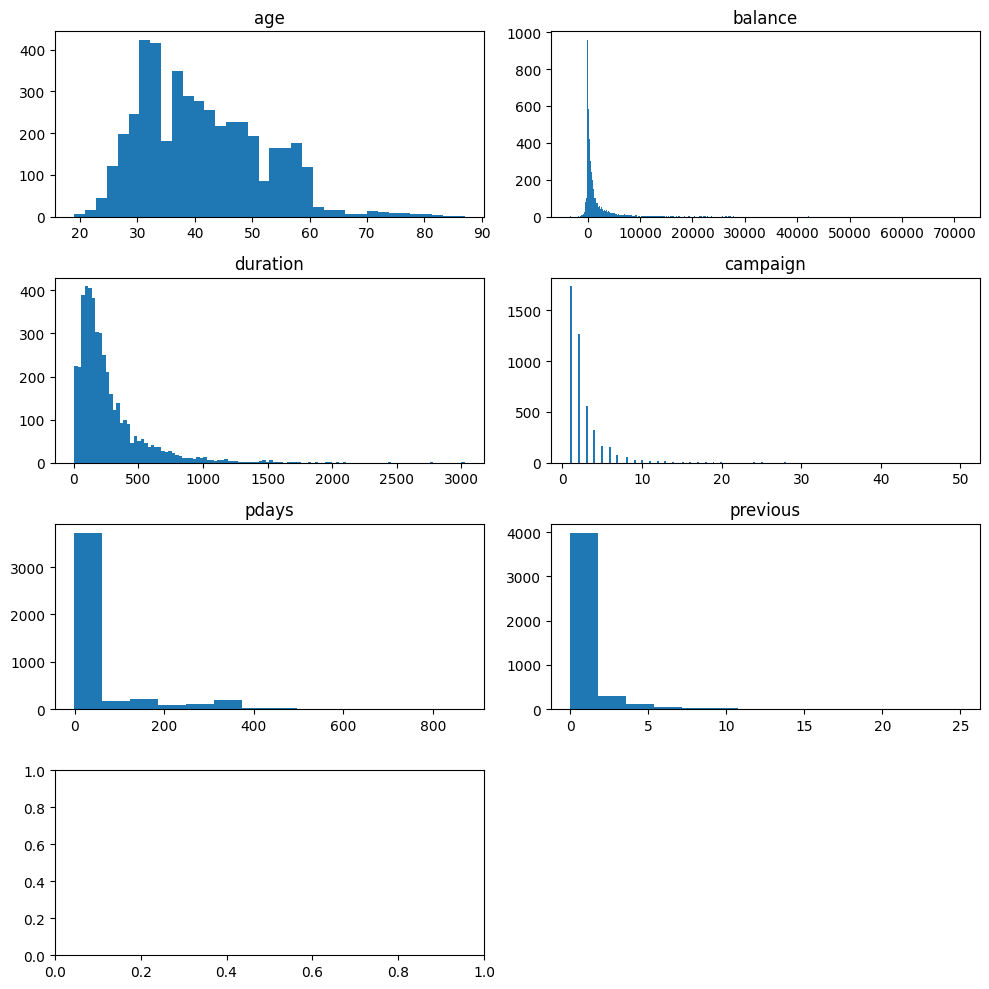

In [11]:
# Create a 4x2 grid of subplots
fig, ax = plt.subplots(4, 2,figsize=(10, 10))

# Plot histograms on each subplot
ax[0, 0].hist(df['age'], bins="auto")
ax[0, 1].hist(df['balance'], bins="auto")
ax[1, 0].hist(df['duration'], bins="auto")
ax[1, 1].hist(df['campaign'], bins="auto")
ax[2, 0].hist(df['pdays'], bins="auto")
ax[2, 1].hist(df['previous'], bins="auto")

# Set titles for each subplot
ax[0, 0].set_title('age')
ax[0, 1].set_title('balance')
ax[1, 0].set_title('duration')
ax[1, 1].set_title('campaign')
ax[2, 0].set_title('pdays')
ax[2, 1].set_title('previous')

# Remove the empty subplot in the last row and last column
fig.delaxes(ax[3, 1])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()